# **IDS 594 Machine Learning with Python Final Project**


# **Importing Libraries**

In [0]:
import pandas as pd
import os

In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
from sklearn import datasets, linear_model, metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, roc_auc_score, roc_curve, recall_score

In [0]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
import time
from __future__ import print_function
import keras
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib.pyplot import plot
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adam
% matplotlib inline

# **Loading Dataset**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving kaggledata.csv to kaggledata (1).csv


In [0]:
file = "kaggledata.csv"
data = pd.read_csv(file)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


# **Data Exploration**

**Checking for NULL values**

In [0]:
dataset = data
dataset.isnull().any()    #Last Column Unnamed: 32 has NaN values which will not be used for modeling

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

**Dropping unwanted columns**

In [0]:
dataset = dataset.drop(['Unnamed: 32'], axis=1)

**Checking for Imbalanced Classes**

In [0]:
dataset.groupby('diagnosis').size()  #62.74% of Benign and 37.25% of Malignant

diagnosis
B    357
M    212
dtype: int64

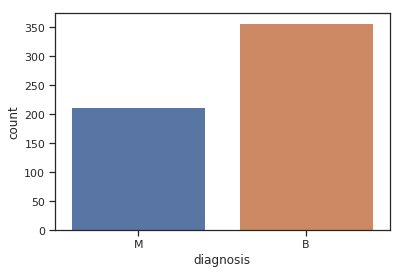

In [0]:

sns.countplot(dataset['diagnosis'],label="Count")

**Checking for Data Statistics**

In [0]:
dataset.groupby('diagnosis').describe().stack()

id  ...  fractal_dimension_worst
diagnosis                      ...                         
B         count  3.570000e+02  ...               357.000000
          mean   2.654382e+07  ...                 0.079442
          std    1.167397e+08  ...                 0.013804
          min    8.913000e+03  ...                 0.055210
          25%    8.746620e+05  ...                 0.070090
          50%    9.089160e+05  ...                 0.077120
          75%    8.812816e+06  ...                 0.085410
          max    9.113205e+08  ...                 0.148600
M         count  2.120000e+02  ...               212.000000
          mean   3.681805e+07  ...                 0.091530
          std    1.378965e+08  ...                 0.021553
          min    8.670000e+03  ...                 0.055040
          25%    8.613450e+05  ...                 0.076302
          50%    8.953665e+05  ...                 0.087600
          75%    8.911290e+06  ...                 0.102625
          max    9.112962e+08  ...                 0.207500

[16 rows x 31 columns]

**Data Visualization - Histogram**

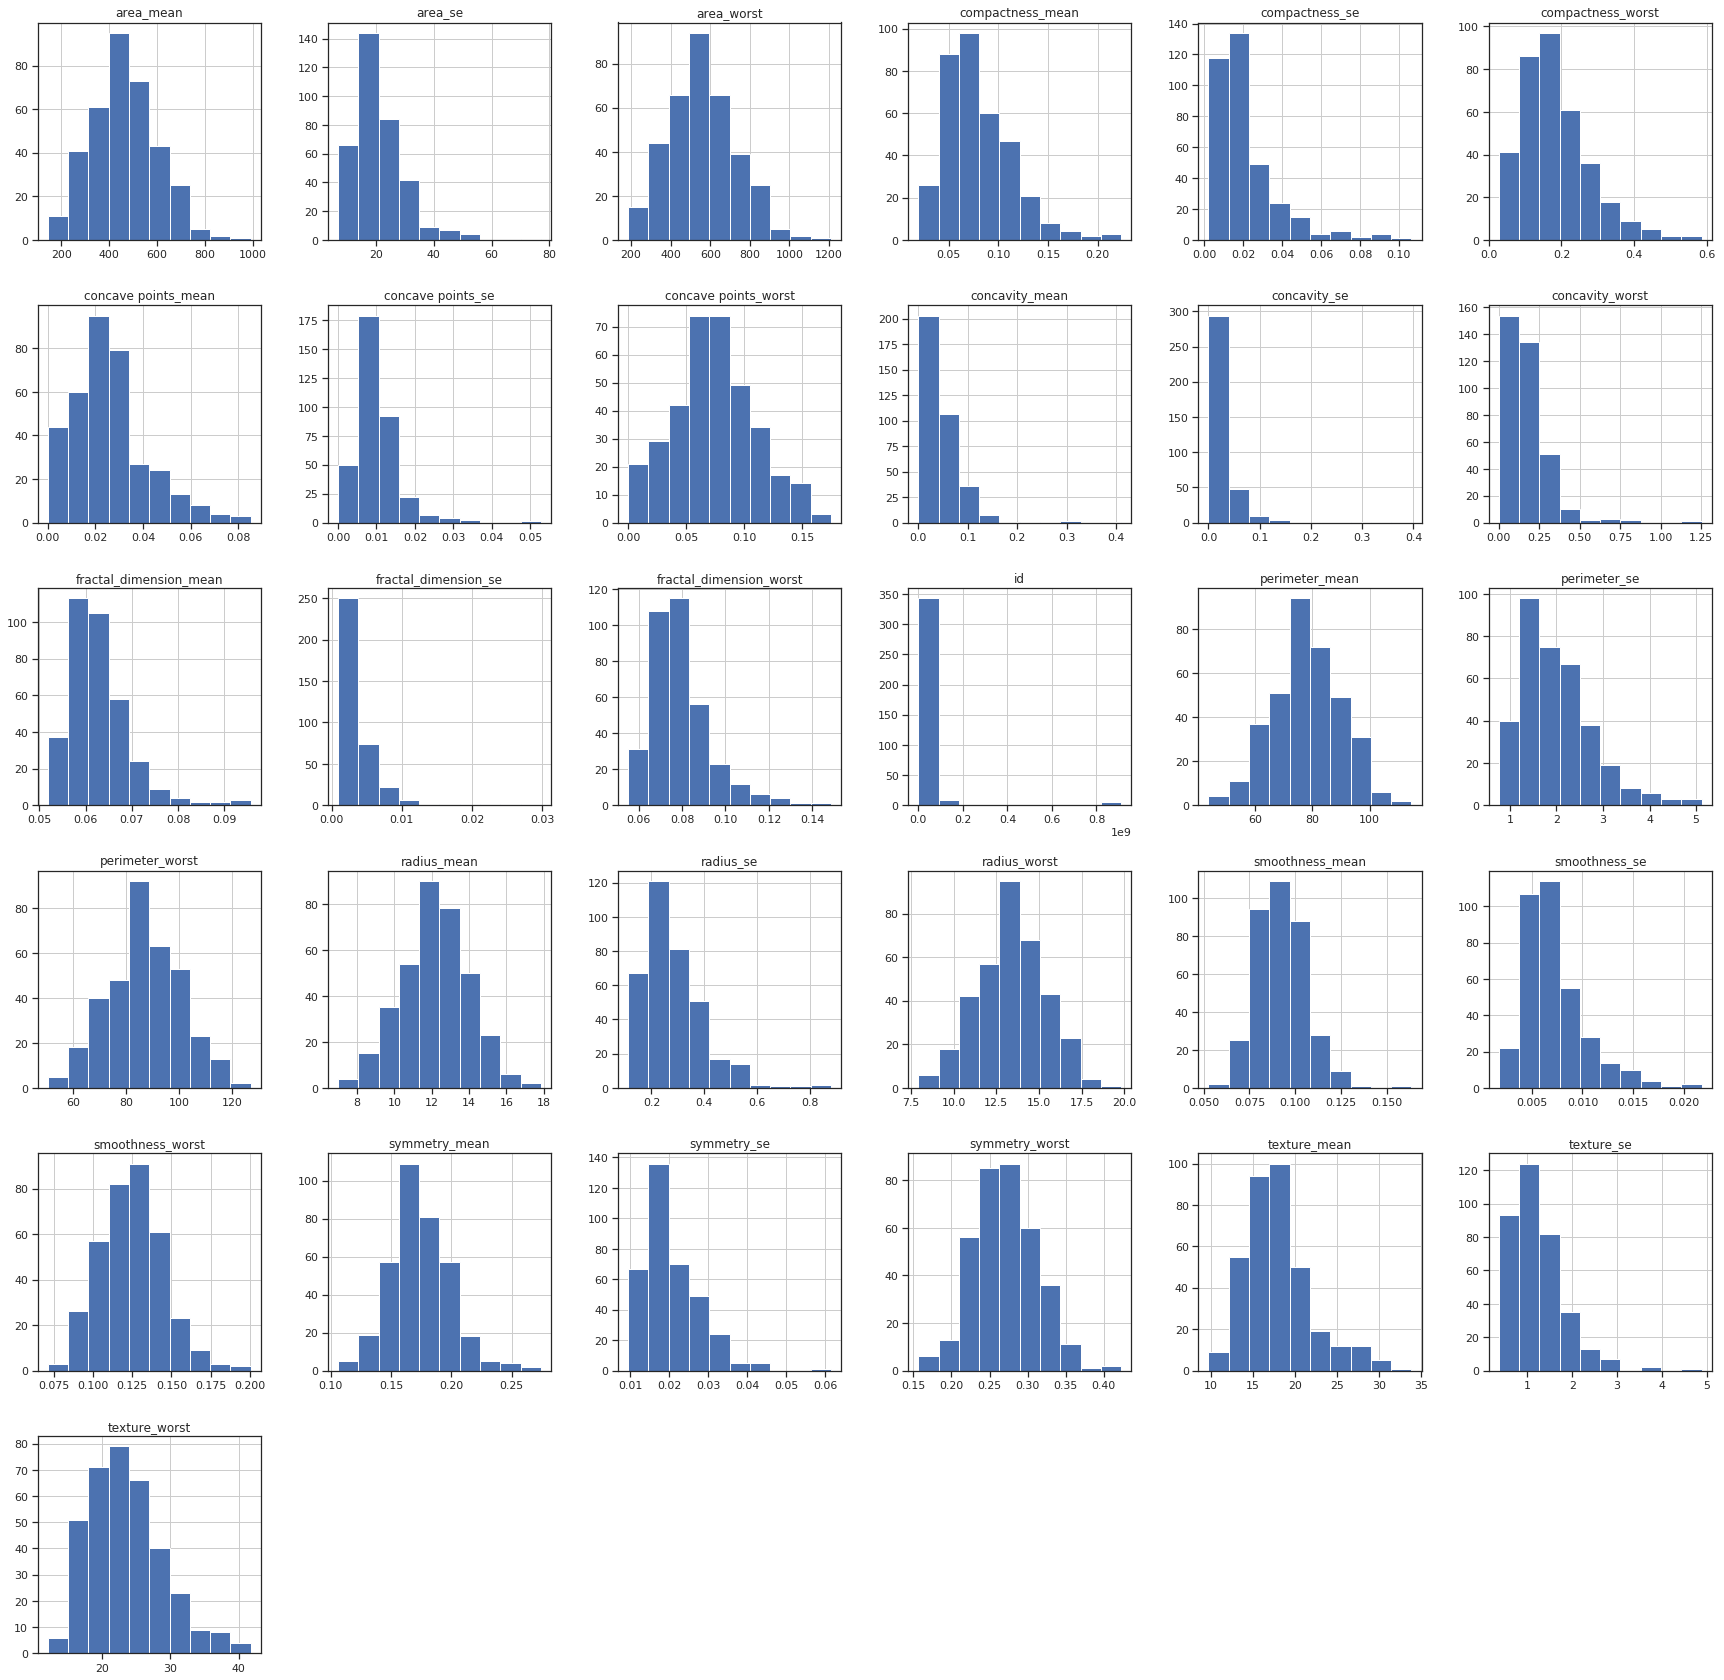

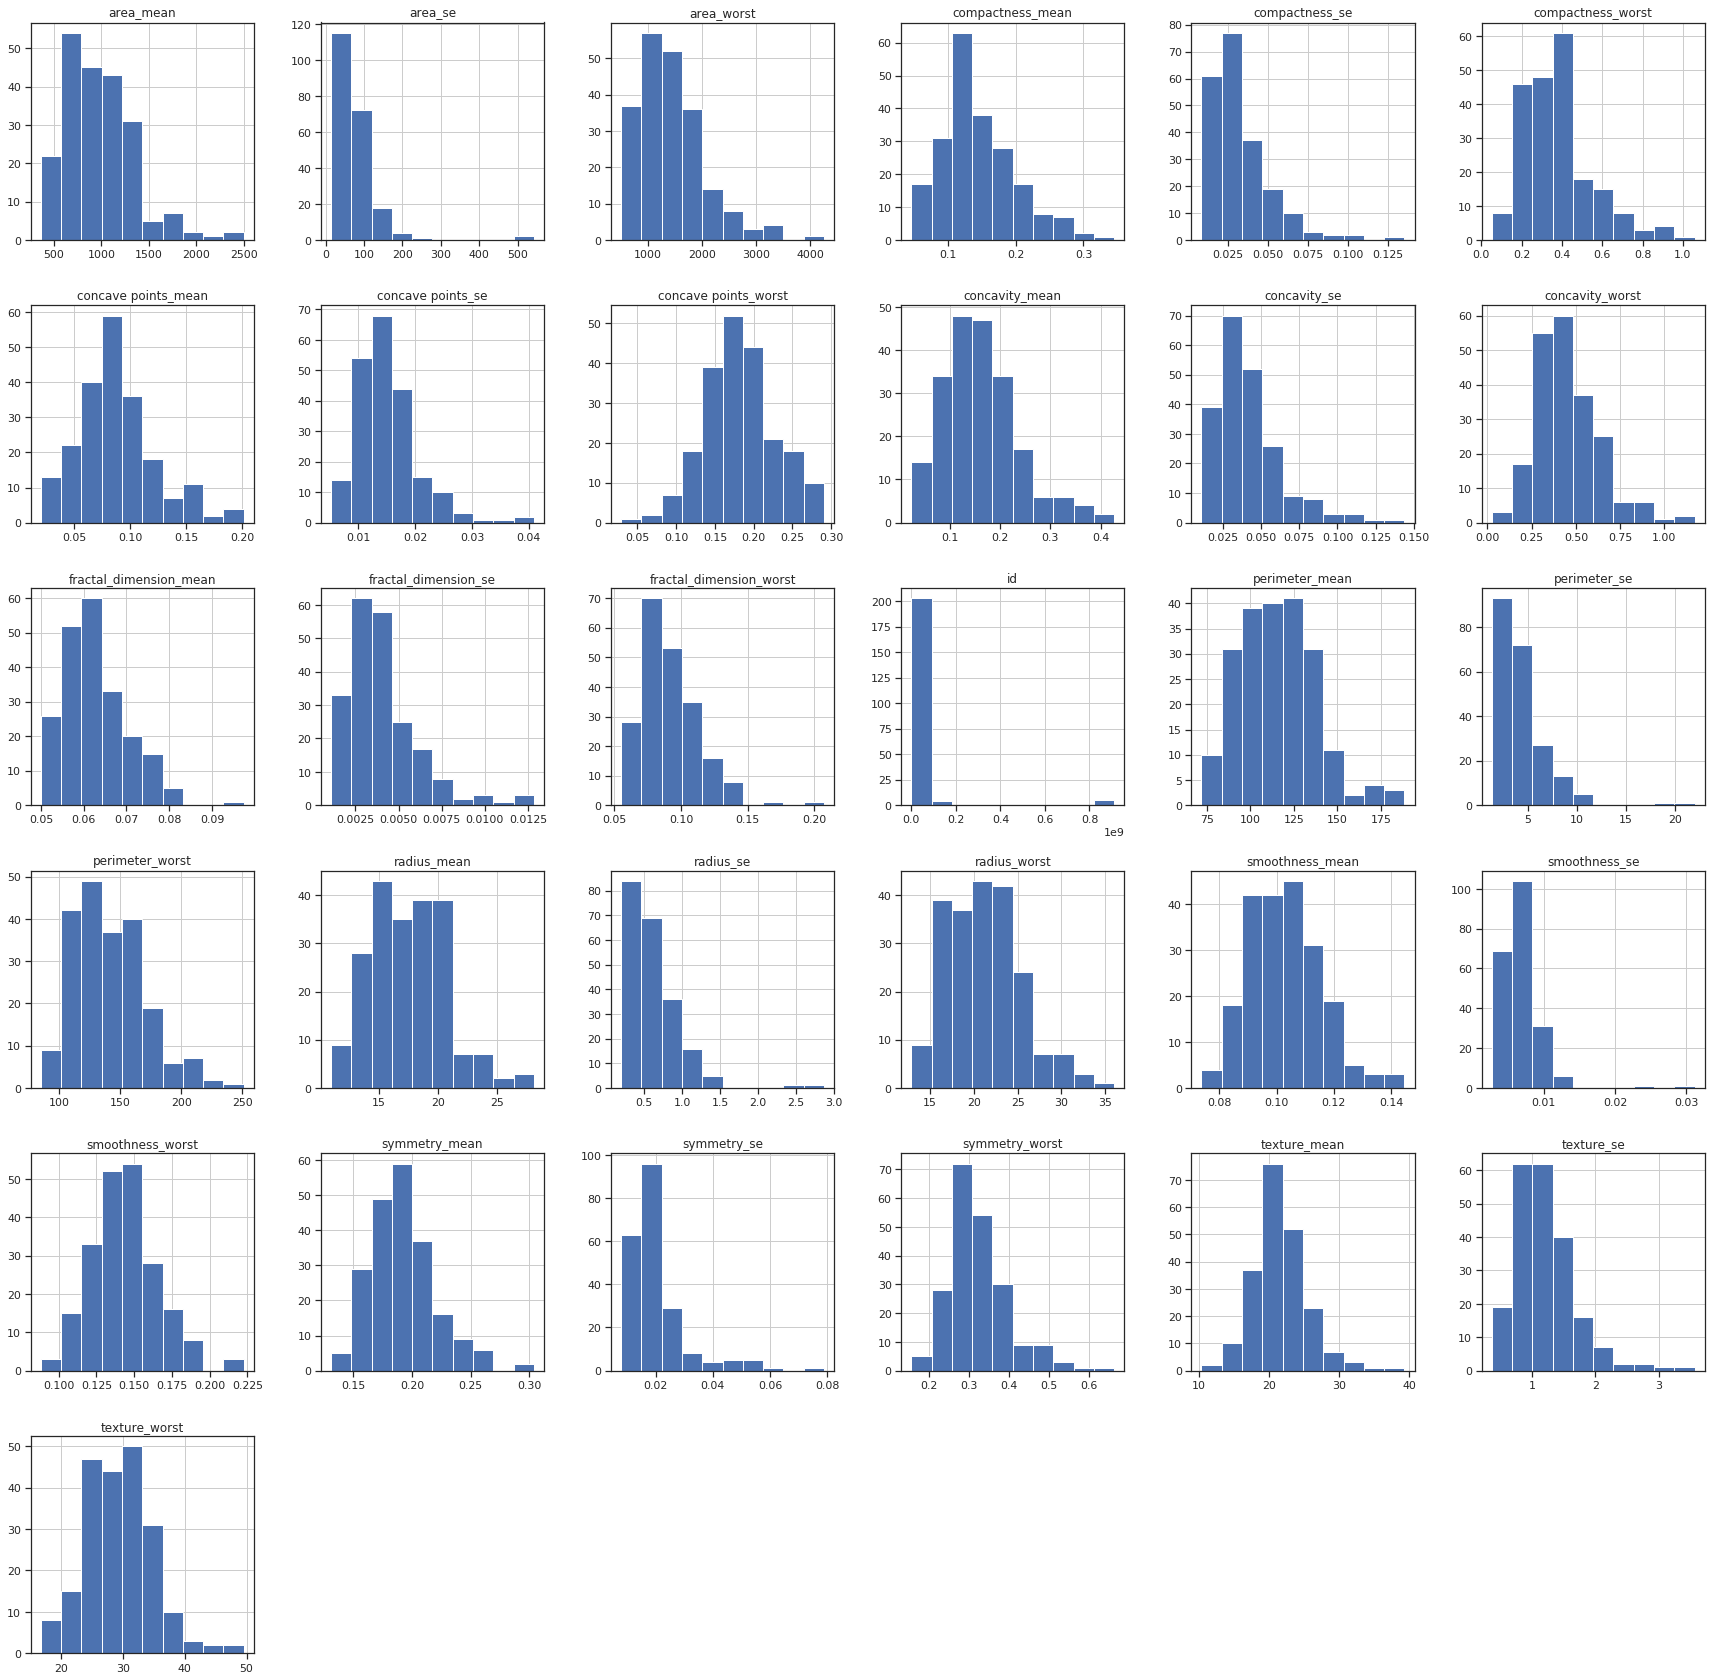

In [0]:
gf = dataset.groupby('diagnosis').hist(figsize=(30, 30))

**Checking for Correlation**

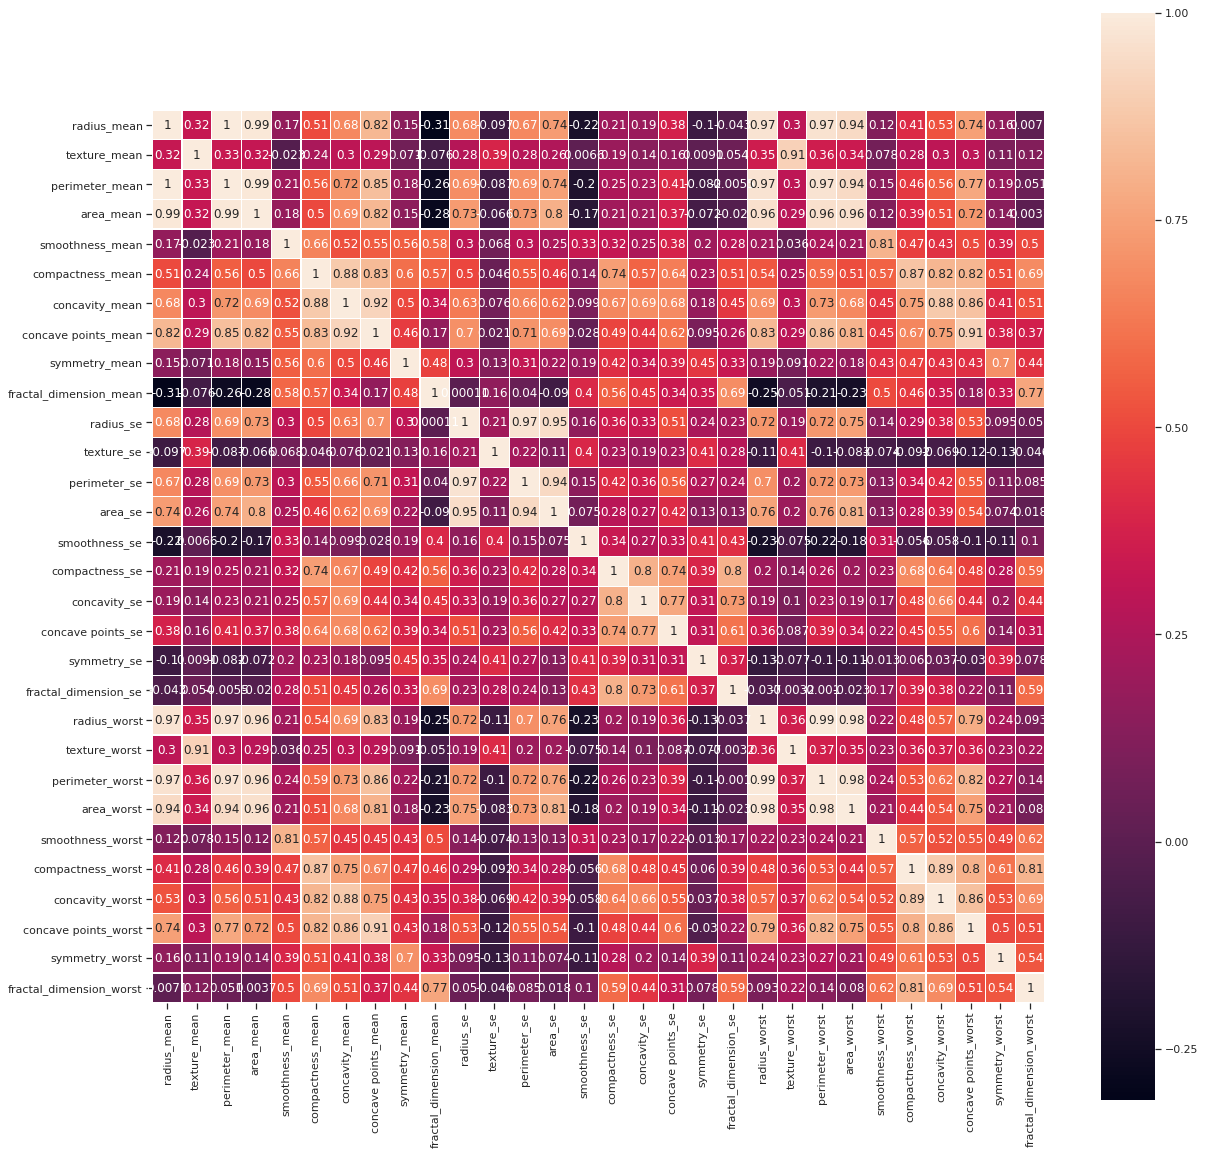

<Figure size 432x288 with 0 Axes>

In [0]:
datavis = dataset.iloc[:,2:32] 
plt.figure(figsize=(20,20))
sns.set(style='ticks', color_codes=True)
sns.heatmap(datavis.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True)
plt.show()
plt.savefig('heatmap.png')

# **Data Pre-Processing**

**Seperating Label from Features**

In [0]:
X=data.iloc[:,2:31]
X


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366


In [0]:
Y=data.iloc[:,1:2]
Y

,diagnosis
0,M
1,M
2,M
3,M
4,M
5,M
6,M
7,M
8,M
9,M


**Changing Malignant and Benign to 0 and 1 & Conversion to Categorical Variable**

In [0]:
Y.diagnosis[Y.diagnosis == 'B'] = 0
Y.diagnosis[Y.diagnosis == 'M'] = 1
print(Y)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


    diagnosis
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          0
20          0
21          0
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
..        ...
539         0
540         0
541         0
542         0
543         0
544         0
545         0
546         0
547         0
548         0
549         0
550         0
551         0
552         0
553         0
554         0
555         0
556         0
557         0
558         0
559         0
560         0
561         0
562         1
563         1
564         1
565         1
566         1
567         1
568         0

[569 rows x 1 columns]


In [0]:
Y=Y.astype('category')

# Splitting Data into Training, Validation & Test Dataset

In [0]:
trainXL, testXL, trainYL, testYL = train_test_split(X, Y, test_size=.30, random_state=0)

In [0]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.30, random_state=0)

In [0]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=.15, random_state=0)

In [0]:
testX.shape, testY.shape

((171, 29), (171, 1))

In [0]:
trainX.shape, trainY.shape

((338, 29), (338, 1))

In [0]:
valX.shape, valY.shape

((60, 29), (60, 1))

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(trainX)
trainX_std = scaler.transform(trainX)
valX_std  = scaler.transform(valX)

In [0]:
scaler = StandardScaler().fit(trainXL)
trainXL_std = scaler.transform(trainXL)
testXL_std  = scaler.transform(testXL)

In [0]:
def dataSetAnalysis(df):
    #view starting values of data set
    print("Dataset Head")
    print(X.head(3))
    print("=" * 30)
    
    # View features in data set
    print("Dataset Features")
    print(X.columns.values)
    print("=" * 30)
    
    # View How many samples and how many missing values for each feature
    print("Dataset Features Details")
    print(X.info())
    print("=" * 30)
    
    # view distribution of numerical features across the data set
    print("Dataset Numerical Features")
    print(X.describe())
    print("=" * 30)
    
#     # view distribution of categorical features across the data set
#     print("Dataset Categorical Features")
#     print(X.describe(include=['O']))
#     print("=" * 30)

dataSetAnalysis(X)
print(Y.describe())

Dataset Head
   radius_mean  texture_mean  ...  concave points_worst  symmetry_worst
0        17.99         10.38  ...                0.2654          0.4601
1        20.57         17.77  ...                0.1860          0.2750
2        19.69         21.25  ...                0.2430          0.3613

[3 rows x 29 columns]
Dataset Features
['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst']
Dataset Features Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 29 columns):
radius_mean               569 n

# **ANN**

**Cross Validation & Parameter Selection**

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
  classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1,5],'epochs': [100],'optimizer': ['adam','rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(trainXL_std, trainYL)



Epoch 1/100


358/358 [==============================] - 5s 15ms/step - loss: 0.5847 - acc: 0.8883
Epoch 2/100
358/358 [==============================] - 2s 5ms/step - loss: 0.4027 - acc: 0.9665
Epoch 3/100
358/358 [==============================] - 2s 5ms/step - loss: 0.3399 - acc: 0.9749
Epoch 4/100
358/358 [==============================] - 2s 5ms/step - loss: 0.2910 - acc: 0.9777
Epoch 5/100
358/358 [==============================] - 2s 5ms/step - loss: 0.2516 - acc: 0.9804
Epoch 6/100
358/358 [==============================] - 2s 5ms/step - loss: 0.2174 - acc: 0.9860
Epoch 7/100
358/358 [==============================] - 2s 5ms/step - loss: 0.1911 - acc: 0.9832
Epoch 8/100
358/358 [==============================] - 2s 5ms/step - loss: 0.1681 - acc: 0.9832
Epoch 9/100
358/358 [==============================] - 2s 5ms/step - loss: 0.1485 - acc: 0.9860
Epoch 10/100
358/358 [==============================] - 2s 5ms/step - loss: 0.1329 - acc: 0.9888
Epoch 11/100
358/358 [============

KeyboardInterrupt: ignored

In [0]:
trainXL_std.shape


(398, 29)

In [0]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("best_parameters: ")
print(best_parameters)
print("\nbest_accuracy: ")
print(best_accuracy)

best_parameters: 
{'batch_size': 1, 'epochs': 100, 'optimizer': 'rmsprop'}

best_accuracy: 
0.9252747252747253


**Fitting the ANN model using parameters found**

In [0]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() 

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [0]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
classifier.fit(trainX_std, trainY, batch_size = 1, epochs = 100)

Epoch 1/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0688 - acc: 0.9882
Epoch 2/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0535 - acc: 0.9882
Epoch 3/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0461 - acc: 0.9882
Epoch 4/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0703 - acc: 0.9882
Epoch 5/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0514 - acc: 0.9882
Epoch 6/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0453 - acc: 0.9882
Epoch 7/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0427 - acc: 0.9882
Epoch 8/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0412 - acc: 0.9882
Epoch 9/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0450 - acc: 0.9882
Epoch 10/100
338/338 [==============================] - 2s 5ms/step - loss: 0.0408 - acc: 0.9882
Epoch 11/100
338/338 [=================

In [0]:
from keras.models import load_model

classifier.save('breast_cancer_model.h5')

**Running ANN model against Test Data**

In [0]:
y_predv = classifier.predict(valX_std)
y_predv = [ 1 if y>=0.5 else 0 for y in y_predv ]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valY, y_predv)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[40  1]
 [ 0 19]]
Accuracy: 98.33333333333333%


In [0]:
y_predt = classifier.predict(testXL_std)
y_predt = [ 1 if y>=0.5 else 0 for y in y_predt ]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testYL, y_predt)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[106   2]
 [  2  61]]
Accuracy: 97.6608187134503%


In [0]:
confusion_matrix(testYL, y_predt)

In [0]:
cm = pd.DataFrame(confusion_matrix(testYL, tpredYL), columns=(0,1), index=(0,1))
sns.heatmap(cm, annot=True, fmt='d')

In [0]:
precision_score(testYL, y_predt)

In [0]:
recall_score(testYL, y_predt)

In [0]:
roc_auc_score(testYL, y_predt)

In [0]:
roc_curve(testYL, y_predt)
fpr, tpr, threshold = metrics.roc_curve(testYL, y_predt)
roc_auc = metrics.auc(fpr, tpr)

In [0]:
# plotting the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [0]:
steps = [('scaler', StandardScaler()), ('classifier', LogisticRegression(multi_class="ovr"))]
pipeline2 = Pipeline(steps)



# **KNN CLASSIFIER**



In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Fitting the KNN model using K = 1

knn1 = KNeighborsClassifier(n_neighbors=1)

# Train the model using the training sets
knn1.fit(trainX_std,trainY)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# Evaluating accuracy on training set at K = 1 

predY = knn1.predict(trainX_std)
print("When k=1, Accuracy on training set:",metrics.accuracy_score(trainY, predY))

When k=1, Accuracy on training set: 1.0


In [0]:
# Evaluating accuracy on validation set at K = 1 

vpredY = knn1.predict(valX_std)
print("When k=1, Accuracy on validation set:",metrics.accuracy_score(valY, vpredY))

When k=1, Accuracy on validation set: 0.95


## **Finding the best KNN parameters through CV**

In [0]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
clf = KNeighborsClassifier()
pipeline = Pipeline([('transformer', scaler), ('estimator', clf)])

In [0]:
# param_candidate defines the set of hyperparameters that you want your function to analyze
from sklearn.model_selection import GridSearchCV
param_candidate = [{'estimator__n_neighbors': np.arange(1, 100)}]

In [0]:
# Create a classifier object with GridSearchCV and param_candidate and fit the GridSearchCV object with X_train_outer, and y_train_outer 
# Read Python's documentation if anything is unclear!

clf2 = GridSearchCV(estimator = pipeline, param_grid=param_candidate, scoring = 'accuracy', cv=10)

clf2.fit(trainXL, trainYL)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('estimator',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                               

In [0]:
# print clf.best_score_ (refer to Python's documentation for the attributes of clf)
print('Best score for data:', clf2.best_score_) 

Best score for data: 0.964824120603015


In [0]:
# View the best parameters for the model found using grid search
print('Best k:',clf2.best_params_) 

Best k: {'estimator__n_neighbors': 5}


In [0]:
allscores=clf2.cv_results_['mean_test_score']
print(allscores)

[0.94974874 0.95226131 0.96231156 0.96231156 0.96482412 0.96231156
 0.96231156 0.96231156 0.96231156 0.95728643 0.95979899 0.95477387
 0.95728643 0.95226131 0.95477387 0.95226131 0.95979899 0.94974874
 0.95477387 0.95226131 0.95226131 0.94974874 0.94974874 0.95226131
 0.95226131 0.95226131 0.95226131 0.94974874 0.95226131 0.94974874
 0.95226131 0.94974874 0.94974874 0.95226131 0.95226131 0.95226131
 0.94974874 0.95226131 0.94974874 0.94723618 0.94974874 0.94974874
 0.94723618 0.94723618 0.94723618 0.94974874 0.94723618 0.94472362
 0.94723618 0.94472362 0.94472362 0.94472362 0.94472362 0.94221106
 0.94472362 0.94221106 0.94221106 0.93718593 0.93718593 0.93467337
 0.93718593 0.93467337 0.93467337 0.93467337 0.93467337 0.92713568
 0.9321608  0.92964824 0.92964824 0.92462312 0.92462312 0.92462312
 0.92462312 0.91959799 0.91959799 0.91708543 0.92964824 0.92211055
 0.92462312 0.91959799 0.92211055 0.9120603  0.91959799 0.90954774
 0.91457286 0.9120603  0.91457286 0.90703518 0.90703518 0.9070

Text(0, 0.5, 'Accuracy score')

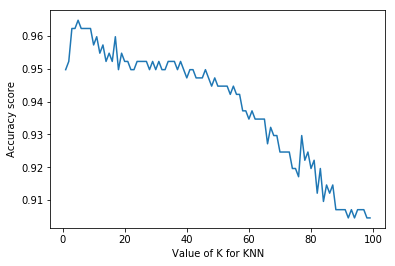

In [0]:
k_range = range(1, 100)

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, allscores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy score')

In [0]:
scaler = StandardScaler().fit(trainXL)
trainXL_std = scaler.transform(trainXL)
testXL_std  = scaler.transform(testXL)

In [0]:
# Fitting the KNN model using K = 5

knn5 = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn5.fit(trainXL_std,trainYL)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# Evaluating accuracy on training set at K = 5 

predYL = knn5.predict(trainXL_std)
print("When k=5, Accuracy on training set:",metrics.accuracy_score(trainYL, predYL))

When k=5, Accuracy on training set: 0.9723618090452262


##  KNN Performance metrics

In [0]:
# Evaluating accuracy on test set at K = 5 

tpredYL = knn5.predict(testXL_std)
print("When k=5, Accuracy on test set:",metrics.accuracy_score(testYL, tpredYL))

When k=5, Accuracy on test set: 0.9532163742690059


In [0]:
confusion_matrix(testYL, tpredYL)

array([[106,   2],
       [  6,  57]])

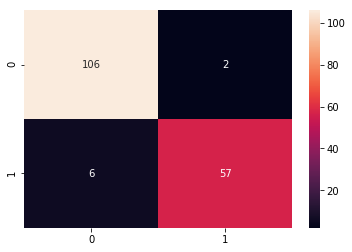

In [0]:
cm = pd.DataFrame(confusion_matrix(testYL, tpredYL), columns=(0,1), index=(0,1))
sns.heatmap(cm, annot=True, fmt='d')

In [0]:
precision_score(testYL, tpredYL)

0.9661016949152542

In [0]:
recall_score(testYL, tpredYL)

0.9047619047619048

In [0]:
roc_auc_score(testYL, tpredYL)

0.943121693121693

In [0]:
roc_curve(testYL, tpredYL)
fpr, tpr, threshold = metrics.roc_curve(testYL, tpredYL)
roc_auc = metrics.auc(fpr, tpr)

(array([0.        , 0.01851852, 1.        ]),
 array([0.       , 0.9047619, 1.       ]),
 array([2, 1, 0]))

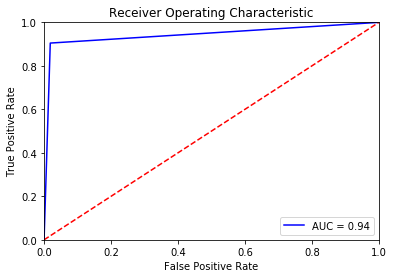

In [0]:
# plotting the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [0]:
steps = [('scaler', StandardScaler()), ('classifier', LogisticRegression(multi_class="ovr"))]
pipeline2 = Pipeline(steps)

In [0]:
pipeline2

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# Use the cross_val_score on logistic regression on X_train_outer and y_train_outer with cv=10 and get scores
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(pipeline2, trainXL, trainYL, cv=10)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:43

array([1.   , 1.   , 0.975, 0.95 , 0.975, 0.925, 1.   , 1.   , 1.   ,
       1.   ])

In [0]:
scores.mean()

0.9824999999999999

In [0]:
logreg = LogisticRegression()
logreg.fit(trainXL_std, trainYL)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Logistic Regression Performance metrics



In [0]:
y_pred_te = logreg.predict(testXL_std)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(testXL_std, testYL)))

Accuracy of logistic regression classifier on test set: 0.97


In [0]:
y_pred_tr = logreg.predict(trainXL_std)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(trainXL_std, trainYL)))

Accuracy of logistic regression classifier on train set: 0.99


In [0]:
confusion_matrix(testYL, y_pred_te)

array([[107,   1],
       [  4,  59]])

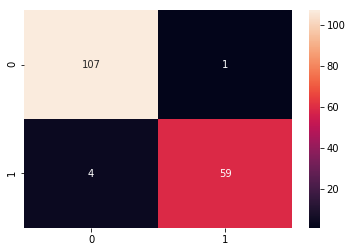

In [0]:
cm = pd.DataFrame(confusion_matrix(testYL, y_pred_te), columns=(0,1), index=(0,1))
sns.heatmap(cm, annot=True, fmt='d')

In [0]:
precision_score(testYL, y_pred_te)

0.9833333333333333

In [0]:
recall_score(testYL, y_pred_te)

0.9365079365079365

In [0]:
roc_auc_score(testYL, y_pred_te)

0.9636243386243386

In [0]:
roc_curve(testYL, y_pred_te)
fpr, tpr, threshold = metrics.roc_curve(testYL, y_pred_te)
roc_auc = metrics.auc(fpr, tpr)

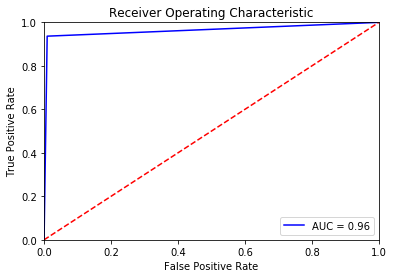

In [0]:
# plotting the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Decision Tree Classifier**

In [0]:
from sklearn import tree
DTmodel = tree.DecisionTreeClassifier()

In [0]:
DTmodel.fit(trainXL_std, trainYL)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict_DT = DTmodel.predict(testXL_std)
from sklearn.metrics import accuracy_score

##  Decision Tree Performance metrics

In [0]:
accuracy_score(testYL, y_predict_DT)

0.9298245614035088

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testYL, y_predict_DT)

array([[99,  9],
       [ 3, 60]])

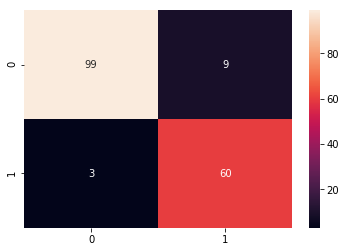

In [0]:
cm = pd.DataFrame(confusion_matrix(testYL, y_predict_DT), columns=(0,1), index=(0,1))
sns.heatmap(cm, annot=True, fmt='d')

In [0]:
precision_score(testYL, y_predict_DT)

0.8695652173913043

In [0]:
recall_score(testYL, y_predict_DT)

0.9523809523809523

In [0]:
roc_auc_score(testYL, y_predict_DT)

0.9345238095238094

In [0]:
roc_curve(testYL, y_predict_DT)
fpr, tpr, threshold = metrics.roc_curve(testYL, y_predict_DT)
roc_auc = metrics.auc(fpr, tpr)

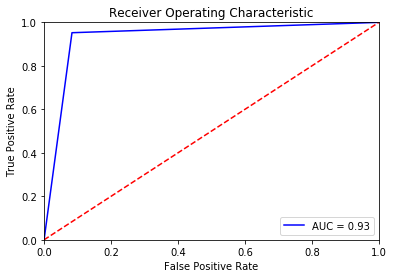

In [0]:
# plotting the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)

In [0]:
random_forest.fit(trainXL_std, trainYL)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
y_predict_RF = random_forest.predict(testXL_std)

## > Random Forest Performance metrics

In [0]:
accuracy_score(testYL, y_predict_RF)

0.9707602339181286

In [0]:
cols = ['diagnosis']

In [0]:
y_predict_RF = pd.DataFrame(y_predict_RF,columns=cols)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testYL, y_predict_RF)

array([[106,   2],
       [  3,  60]])

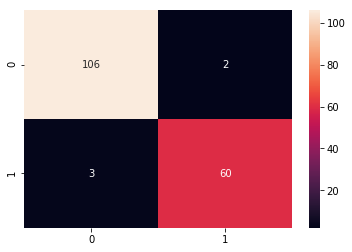

In [0]:
cm = pd.DataFrame(confusion_matrix(testYL, y_predict_RF), columns=(0,1), index=(0,1))
sns.heatmap(cm, annot=True, fmt='d')

In [0]:
precision_score(testYL, y_predict_RF)

0.967741935483871

In [0]:
recall_score(testYL, y_predict_RF)

0.9523809523809523

In [0]:
roc_auc_score(testYL, y_predict_RF)

0.966931216931217

In [0]:
roc_curve(testYL, y_predict_RF)
fpr, tpr, threshold = metrics.roc_curve(testYL, y_predict_RF)
roc_auc = metrics.auc(fpr, tpr)

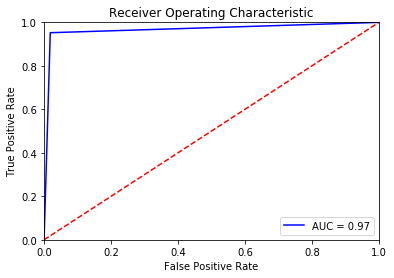

In [0]:
# plotting the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()